In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


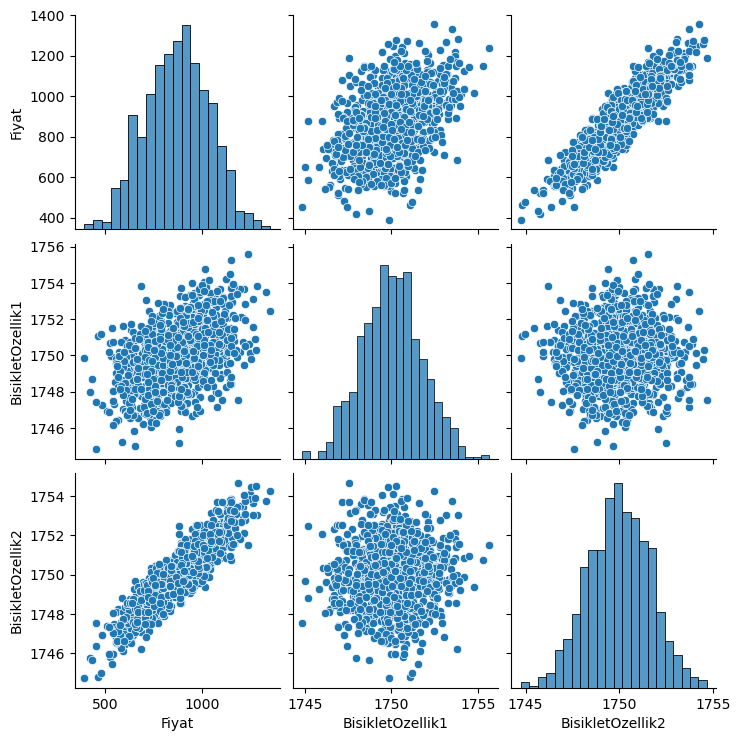

In [4]:
sbn.pairplot(dataFrame)

### Split dataset as test/train

In [5]:
# y  = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1", "BisikletOzellik2"]].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

### Scaling

In [7]:
scaler = MinMaxScaler()

In [8]:
scaler.fit(X_train)

MinMaxScaler()

In [9]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train

array([[0.63279551, 0.54584337],
       [0.31806303, 0.361764  ],
       [0.41942095, 0.20840721],
       ...,
       [0.2352117 , 0.53846191],
       [0.7576794 , 0.21208439],
       [0.4292982 , 0.18647969]])

In [11]:
model = Sequential()

model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse")

In [12]:
model.fit(X_train, y_train, epochs = 250)

Epoch 1/250
25/25 [==============================] - 1s 1ms/step - loss: 794463.5000
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 794239.0625
Epoch 3/250
25/25 [==============================] - 0s 917us/step - loss: 793930.8750
Epoch 4/250
25/25 [==============================] - 0s 1ms/step - loss: 793591.1875
Epoch 5/250
25/25 [==============================] - 0s 1ms/step - loss: 793215.0625
Epoch 6/250
25/25 [==============================] - 0s 1ms/step - loss: 792784.0625
Epoch 7/250
25/25 [==============================] - 0s 1ms/step - loss: 792286.1875
Epoch 8/250
25/25 [==============================] - 0s 980us/step - loss: 791721.9375
Epoch 9/250
25/25 [==============================] - 0s 917us/step - loss: 791091.7500
Epoch 10/250
25/25 [==============================] - 0s 1ms/step - loss: 790381.8125
Epoch 11/250
25/25 [==============================] - 0s 2ms/step - loss: 789590.7500
Epoch 12/250
25/25 [==============================] - 0s 

25/25 [==============================] - 0s 832us/step - loss: 22176.2227
Epoch 96/250
25/25 [==============================] - 0s 677us/step - loss: 16801.1895
Epoch 97/250
25/25 [==============================] - 0s 996us/step - loss: 12669.9502
Epoch 98/250
25/25 [==============================] - 0s 1ms/step - loss: 9834.0488
Epoch 99/250
25/25 [==============================] - 0s 689us/step - loss: 8296.8984
Epoch 100/250
25/25 [==============================] - 0s 1ms/step - loss: 7712.3389
Epoch 101/250
25/25 [==============================] - 0s 782us/step - loss: 7571.3188
Epoch 102/250
25/25 [==============================] - 0s 696us/step - loss: 7478.8525
Epoch 103/250
25/25 [==============================] - 0s 694us/step - loss: 7357.4771
Epoch 104/250
25/25 [==============================] - 0s 788us/step - loss: 7259.9302
Epoch 105/250
25/25 [==============================] - 0s 691us/step - loss: 7160.5552
Epoch 106/250
25/25 [==============================] - 0s 698u

Epoch 190/250
25/25 [==============================] - 0s 688us/step - loss: 676.8278
Epoch 191/250
25/25 [==============================] - 0s 992us/step - loss: 639.0421
Epoch 192/250
25/25 [==============================] - 0s 735us/step - loss: 603.7775
Epoch 193/250
25/25 [==============================] - 0s 698us/step - loss: 569.5873
Epoch 194/250
25/25 [==============================] - 0s 695us/step - loss: 536.1341
Epoch 195/250
25/25 [==============================] - 0s 725us/step - loss: 503.3275
Epoch 196/250
25/25 [==============================] - 0s 1ms/step - loss: 472.5336
Epoch 197/250
25/25 [==============================] - 0s 922us/step - loss: 442.6942
Epoch 198/250
25/25 [==============================] - 0s 797us/step - loss: 415.0835
Epoch 199/250
25/25 [==============================] - 0s 716us/step - loss: 386.9062
Epoch 200/250
25/25 [==============================] - 0s 1ms/step - loss: 362.1664
Epoch 201/250
25/25 [==============================] - 0s 

In [13]:
loss = model.history.history["loss"]

<AxesSubplot:>

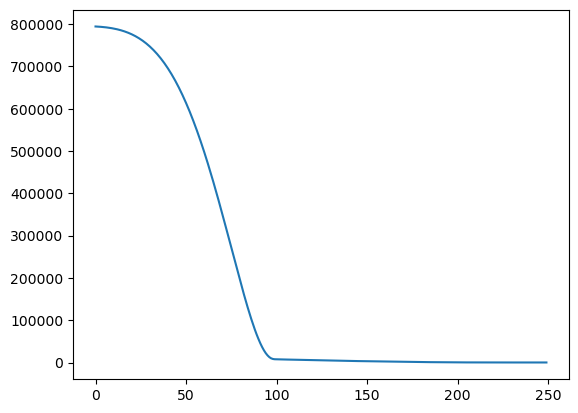

In [14]:
sbn.lineplot(x = range(len(loss)), y = loss)

In [15]:
trainLoss = model.evaluate(X_train, y_train, verbose = 0)

In [16]:
testLoss = model.evaluate(X_test, y_test, verbose = 0)

In [17]:
print(trainLoss)
print(testLoss)

73.15507507324219
79.48035430908203


In [18]:
testPredictions = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [19]:
testPredictions

array([[1078.8254 ],
       [ 625.28094],
       [ 877.30286],
       [ 895.59106],
       [ 900.87823],
       [ 453.46567],
       [ 932.34485],
       [ 992.60956],
       [ 942.2226 ],
       [1017.8837 ],
       [ 752.251  ],
       [ 918.93176],
       [ 948.7876 ],
       [1055.7223 ],
       [1122.3    ],
       [ 683.0479 ],
       [1128.0997 ],
       [ 652.59186],
       [1155.7231 ],
       [ 887.73114],
       [ 894.03955],
       [ 718.04865],
       [ 458.30753],
       [ 613.71075],
       [ 836.20056],
       [1092.1545 ],
       [ 715.22876],
       [ 758.3003 ],
       [ 874.807  ],
       [ 772.0099 ],
       [ 453.03665],
       [ 784.31287],
       [ 729.6931 ],
       [ 648.3663 ],
       [ 887.99493],
       [ 845.0976 ],
       [1036.776  ],
       [1024.0121 ],
       [ 846.14746],
       [ 863.53076],
       [ 758.47876],
       [1175.6201 ],
       [1098.6273 ],
       [1088.8188 ],
       [ 874.24   ],
       [ 598.13385],
       [1146.9158 ],
       [ 974.

In [20]:
predictionDataFrame = pd.DataFrame(y_test, columns = ["Real Y Data"])

In [21]:
predictionDataFrame

,Real Y Data
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
195,1090.014657
196,791.179176
197,858.873563
198,1151.380538


In [22]:
testPredictions = pd.Series(testPredictions.reshape(200, ))

In [23]:
testPredictions

0      1078.825439
1       625.280945
2       877.302856
3       895.591064
4       900.878235
          ...     
195    1082.193359
196     786.730103
197     857.777344
198    1146.000366
199     586.763672
Length: 200, dtype: float32

In [24]:
predictionDataFrame = pd.concat([predictionDataFrame, testPredictions], axis = 1)

In [25]:
predictionDataFrame

,Real Y Data,0
0,1081.652164,1078.825439
1,622.675990,625.280945
2,889.356810,877.302856
3,902.826733,895.591064
4,897.662404,900.878235
...,...,...
195,1090.014657,1082.193359
196,791.179176,786.730103
197,858.873563,857.777344
198,1151.380538,1146.000366


In [26]:
predictionDataFrame.columns = ["Real Y Data", "Prediction Y Data"]

In [27]:
predictionDataFrame

,Real Y Data,Prediction Y Data
0,1081.652164,1078.825439
1,622.675990,625.280945
2,889.356810,877.302856
3,902.826733,895.591064
4,897.662404,900.878235
...,...,...
195,1090.014657,1082.193359
196,791.179176,786.730103
197,858.873563,857.777344
198,1151.380538,1146.000366


<AxesSubplot:xlabel='Real Y Data', ylabel='Prediction Y Data'>

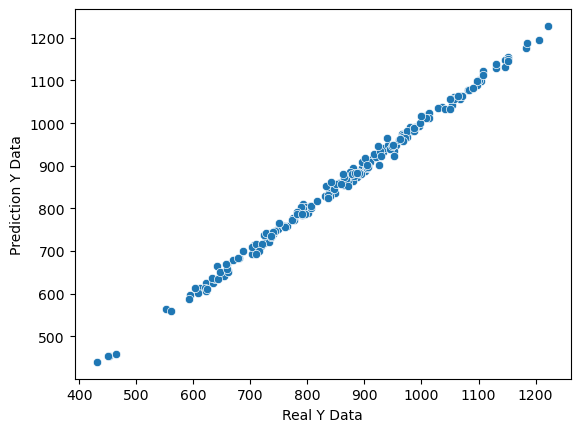

In [28]:
sbn.scatterplot(x = "Real Y Data", y = "Prediction Y Data", data = predictionDataFrame)

In [29]:
mean_absolute_error(predictionDataFrame["Real Y Data"], predictionDataFrame["Prediction Y Data"])

7.045887198874996

In [30]:
mean_squared_error(predictionDataFrame["Real Y Data"], predictionDataFrame["Prediction Y Data"])

79.4803120673973

In [31]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [32]:
newBicycle = [[1760, 1758]]

In [33]:
newBicycle = scaler.transform(newBicycle)

In [34]:
model.predict(newBicycle)

1/1 [==============================] - 0s 15ms/step


array([[1983.5007]], dtype=float32)

In [35]:
model.save("Bicyle_Model.h5")

In [36]:
callingModel = load_model("Bicyle_Model.h5")

In [37]:
callingModel.predict(newBicycle)

1/1 [==============================] - 0s 40ms/step


array([[1983.5007]], dtype=float32)